In [3]:
%matplotlib inline
from utils import *

### Load the district polygon

In [4]:
district = #set

### Load houses

In [5]:
houses = #set

### Extract latitute, longitude pairs from spatial object

In [6]:
houses['lon'] = houses['geometry'].apply(lambda cell: list(cell.centroid.coords)[0][0])
houses['lat'] = houses['geometry'].apply(lambda cell: list(cell.centroid.coords)[0][1])

In [7]:
house_coords = list(zip(houses.lon, houses.lat))

### Google directions API

### Generate the key

In [8]:
key = #set

### Define departure time as timestamp - choose 9am

In [9]:
departure_time = #set timestamp

### Run the cell below to get google API data

In [10]:
access = get_transport_data(house_coords, departure_time, key)

  0%|          | 0/221 [00:00<?, ?it/s]

Get routes from google directions API


100%|██████████| 221/221 [01:11<00:00,  3.33it/s]


Process routes


#### Print the DataFrame

#### Convert DataFrame to GeoDataFrame

In [13]:
crs = {'init' :'epsg:4326'}
geometry = [Point(xy) for xy in zip(access.lon, access.lat)]
geo_access = gpd.GeoDataFrame(access, crs=crs, geometry=geometry)
geo_access.head()

,originId,lon,lat,walking,transfers,duration,geometry
0,0,37.457744,55.727116,3.500000,4.0,41.800000,POINT (37.457744 55.727116)
1,1,37.456460,55.726908,3.716667,4.0,42.000000,POINT (37.45646 55.726908)
2,2,37.453917,55.726391,5.550000,4.0,51.983333,POINT (37.453917 55.726391)
3,3,37.453567,55.725737,13.483333,2.0,48.700000,POINT (37.453567 55.725737)
4,4,37.454223,55.713121,1.500000,4.0,51.416667,POINT (37.454223 55.713121)


#### Plot flat maps fom geopandas. Vusialize walking time, duration time, number of transfers

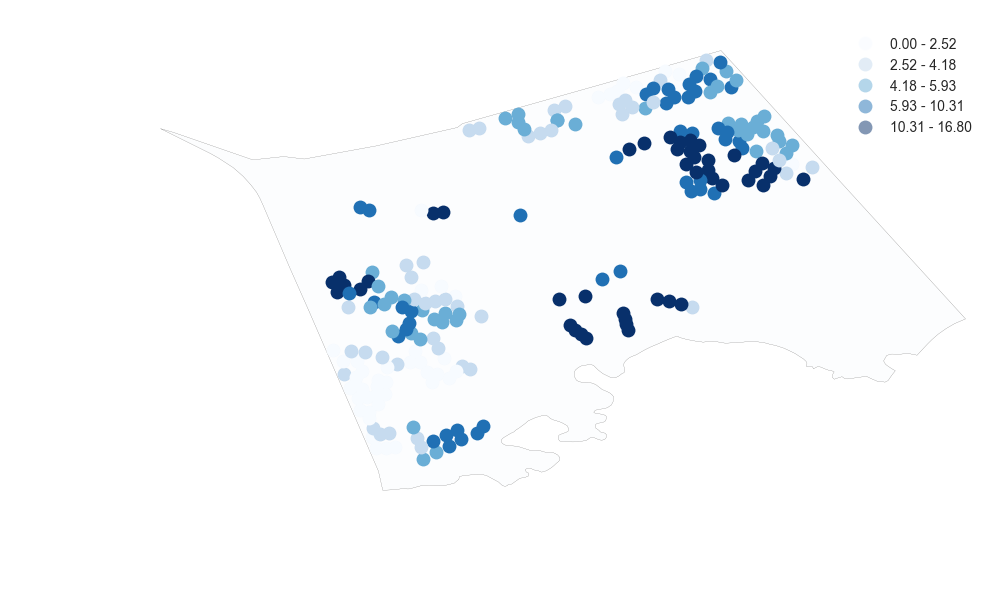

In [16]:
base = district.plot(linewidth=0.1, facecolor=None, alpha=0.01, figsize=(12,10));
base.set_axis_off()
geo_access.plot(column='walking',ax=base, cmap='Blues', scheme='Quantiles',legend=True,markersize=10);

### Plot folium map

In [17]:
center_lat = list(district.centroid[0].coords)[0][1]
center_lon = list(district.centroid[0].coords)[0][0]

In [20]:
mapit = folium.Map([center_lat, center_lon], zoom_start=12,
                    tiles='Cartodb positron')


style_function = lambda feature: dict(fillColor='AECCAE',
                                      color='#DCDCDC',
                                      weight=.01,
                                      opacity=0.01)


for index in access.index:

    folium.CircleMarker(location=[access.loc[index,'lat'], access.loc[index,'lon']], 
                        popup='walking: {}'.format(access.loc[index,'walking']),
                        radius=access.loc[index,'walking'],
                        fill_color='#3186cc').add_to( mapit,)



polygon = folium.features.GeoJson(district,name='district boundary',style_function=style_function)

mapit.add_child(polygon,name='district boundary')
folium.LatLngPopup().add_to(mapit)
folium.LayerControl().add_to(mapit)

In [21]:
mapit

### Analyze the obtained map. What patterns can you find? Try to download google routess for another hour - 18pm and compare the results.